# COVID19-India-Analysis [Kaggle Notebook](https://www.kaggle.com/samacker77k/covid19-india-analysis)
A notebook dedicated to data visualization and analysis of COVID19 Pandemic in India.

---

This notebook visualizes the effects of COVID19 pandemic in India to help understand the effect of the outbreak demographically.

Maintained by:
* Shivani Tyagi [LinkedIn](https://www.linkedin.com/in/shivani-tyagi-09/) [Github](https://github.com/shivitg)
* Nitika Kamboj [LinkedIn](https://linkedin.com/in/nitika-kamboj) [Github](https://github.com/nitika-kamboj)
* Samar Srivastava [LinkedIn](https://linkedin.com/in/samacker77l) [Github](https://github.com/samacker77)
 


<p style="color:red">Since the API that was previously being used to fetch the data has now been revoked. We will be updating the dataset every 24 hours.</p>

---
### Coronavirus 2019(COVID-19) 
#### COVID 19 is an infectious spreading disease,which is casued by severe acute respiratory syndrome coronavirus 2(SARS-Cov-2).This disease was first found in 2019 in Wuhan distirct of China, and is spreading tremendously across the globe,resulted in pandemic declaration by World Health Organization.
---

In [56]:
import datetime

<h4 style="color:green">Last update on</h4>

In [57]:
now = datetime.datetime.now()

print(now)


2020-03-27 16:38:54.744578


In [58]:
!python3 -m pip install folium

You should consider upgrading via the 'pip install --upgrade pip' command.


---

### Importing libraries
---

In [59]:
import requests
import pandas as pd
import logging
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
import numpy as np
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

In [60]:
def load_data():
    df = pd.read_csv('../input/data.csv')
    return df

In [61]:
data = load_data()

---
#### Now we have fetched data successfully. Now we will inspect the data. 

In [62]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 664 | Columns = 17


#### Checking dtypes

In [63]:
data.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[]
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[]
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[]
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]"
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[]


### COVID19 Confirmed cases current location
> Click on the map and counts to play with the graph.

In [64]:
def get_lat_long(string): 
    return string.replace('SRID=4326;POINT ','').strip(')(').split()

data['current_loc_latlong'] = data['current_location_pt'].apply(get_lat_long)

data['current_lat'] = data['current_loc_latlong'].apply(lambda x:x[0])
data['current_long'] = data['current_loc_latlong'].apply(lambda x:x[1])

data.current_lat = data.current_lat.astype('float64')
data.current_long = data.current_long.astype('float64')

m_3 = folium.Map(location=[12.4996, 74.9869], tiles='cartodbpositron', zoom_start=4)

# Add points to the map
mc = MarkerCluster()
for idx, row in data.iterrows():
    if not math.isnan(row['current_long']) and not math.isnan(row['current_lat']):
        mc.add_child(Marker([row['current_long'], row['current_lat']]))
m_3.add_child(mc)

# Display the map
m_3

> On first look we see that the attributes 'id' and 'unique_id' are same. So we check if they have any values that are different.

In [65]:
data.dtypes

id                       int64
unique_id                int64
government_id           object
diagnosed_date          object
age                    float64
gender                  object
detected_city           object
detected_city_pt        object
detected_district       object
detected_state          object
nationality             object
current_status          object
status_change_date      object
notes                   object
current_location        object
current_location_pt     object
contacts                object
current_loc_latlong     object
current_lat            float64
current_long           float64
dtype: object

In [66]:
data[data['id'] == data['unique_id']].shape

(664, 20)

> Since we have same values in both columns. We can drop one of them and make another as the index

In [67]:
data.drop('unique_id',axis=1,inplace=True)

In [68]:
data.set_index('id',inplace=True)

In [69]:
print("Data Shape ~ Rows = {} | Columns = {}".format(data.shape[0],data.shape[1]))

Data Shape ~ Rows = 664 | Columns = 18


In [70]:
data.head()

,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,current_loc_latlong,current_lat,current_long
id,,,,,,,,,,,,,,,,,,
1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[],"[76.21325419999999, 10.5256264]",76.213254,10.525626
2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[],"[76.333482, 9.498000100000001]",76.333482,9.498000
3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[],"[80, 20]",80.000000,20.000000
4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]","[80, 20]",80.000000,20.000000
5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[],"[78.4349398685041, 17.4263524]",78.434940,17.426352


> Since government_id is of no use. We can drop it.

In [71]:
data['government_id'].isna().sum()

478

In [72]:
data.drop('government_id',axis=1,inplace=True)

#### Now we convert date columns to datetime objects since they are in string.

In [73]:
data.dtypes

diagnosed_date          object
age                    float64
gender                  object
detected_city           object
detected_city_pt        object
detected_district       object
detected_state          object
nationality             object
current_status          object
status_change_date      object
notes                   object
current_location        object
current_location_pt     object
contacts                object
current_loc_latlong     object
current_lat            float64
current_long           float64
dtype: object

In [74]:
date_columns = ['diagnosed_date','status_change_date']

In [75]:
for column in date_columns:
    data[column] = pd.to_datetime(data[column])

In [76]:
data.head()

,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,current_loc_latlong,current_lat,current_long
id,,,,,,,,,,,,,,,,,
1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[],"[76.21325419999999, 10.5256264]",76.213254,10.525626
2,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[],"[76.333482, 9.498000100000001]",76.333482,9.498000
3,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[],"[80, 20]",80.000000,20.000000
4,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]","[80, 20]",80.000000,20.000000
5,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[],"[78.4349398685041, 17.4263524]",78.434940,17.426352


#### Now the data is ready for analysis and preprocessing

In [77]:
#Checking null values
data.isna().sum()

diagnosed_date           0
age                    314
gender                   0
detected_city          142
detected_city_pt         0
detected_district      158
detected_state           0
nationality            276
current_status           1
status_change_date      10
notes                    3
current_location       649
current_location_pt      0
contacts                 0
current_loc_latlong      0
current_lat              0
current_long             0
dtype: int64

> Imputing missing values with 'Unknown'

In [78]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].fillna('Unknown')


In [79]:
data.dtypes

diagnosed_date         datetime64[ns]
age                           float64
gender                         object
detected_city                  object
detected_city_pt               object
detected_district              object
detected_state                 object
nationality                    object
current_status                 object
status_change_date     datetime64[ns]
notes                          object
current_location               object
current_location_pt            object
contacts                       object
current_loc_latlong            object
current_lat                   float64
current_long                  float64
dtype: object

In [80]:
data.isna().sum()

diagnosed_date           0
age                    314
gender                   0
detected_city            0
detected_city_pt         0
detected_district        0
detected_state           0
nationality              0
current_status           0
status_change_date      10
notes                    0
current_location         0
current_location_pt      0
contacts                 0
current_loc_latlong      0
current_lat              0
current_long             0
dtype: int64

---
### Now the data is ready for EDA
> Understanding the involved factors in the growth of the Corona Virus via visualization
---

In [81]:
print("Number of Cities Affected from COVID19: ", data['detected_city'].nunique())
print("#----------------------------------------------------------------------------------------#")
print("Cities Affected: ", data[data['detected_city'].isna()==False]['detected_city'].unique())

Number of Cities Affected from COVID19:  155
#----------------------------------------------------------------------------------------#
Cities Affected:  ['Thrissur' 'Alappuzha' 'Kasaragod' 'East Delhi (Mayur Vihar)' 'Hyderabad'
 'Jaipur' 'Gurugram' 'Agra' 'Unknown' 'Janakpuri' 'Ghaziabad'
 'Uttam Nagar' 'Ladakh' 'Kancheepuram' 'Ranni' 'Tri Nagar' 'Jammu'
 'Bengaluru' 'Kannur' 'Pune' 'Amritsar' 'Kozhencherry' 'Kochi' 'Chengalam'
 'Chuchot' 'Mumbai' 'Nellore' 'Kalaburagi' 'Nagpur' 'Thane' 'Lucknow'
 'Delhi' 'Varkala' 'Nedumangad' 'Thiruvanathapuram' 'Ahmednagar'
 'Yavatmal' 'Munnar' 'Thiruvananthapuram' 'Aurangabad' 'Pimpri-Chinchwad'
 'Dehradun' 'Rajouri' 'Kalanadu' 'Malappuram' 'Bhubaneswar' 'Saket'
 'Kargil' 'Leh' 'Mahe' 'Gautam Buddh Nagar' 'Kolkata' 'Chennai'
 'Shrungartali' 'Khanyar' 'Jhunjhunu' 'Dilshad Garden' 'Chandigarh'
 'Kodagu' 'Ongole' 'Raipur' 'Noida' 'Lakhimpur kheri' 'Banga' 'Eriyal'
 'Rajkot' 'Surat' 'Visakapatnam' 'Rana Pratap Bagh' 'Ashok Vihar'
 'Gautam Puri' 'Mohal

---
#### Analysis: 
#### There are total in total 4000 cities in India. Number of cities affected currently are "155".
---

In [82]:
print("Number of States Affected from COVID19: ", data['detected_state'].nunique())
print("#----------------------------------------------------------------------------------------#")
print("States Affected: ", data[data['detected_state'].isna()==False]['detected_state'].unique())

Number of States Affected from COVID19:  26
#----------------------------------------------------------------------------------------#
States Affected:  ['Kerala' 'Delhi' 'Telangana' 'Rajasthan' 'Haryana' 'Uttar Pradesh'
 'Ladakh' 'Tamil Nadu' 'Jammu and Kashmir' 'Karnataka' 'Maharashtra'
 'Punjab' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chandigarh' 'Chhattisgarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram' 'Goa']


---
#### Analysis:
#### India is a federal union comprising 28 states and 8 union territories, for a total of 36 entities. The current affected entities are "26".
---

#### Let's observe the age factor for coronavirus spread
---

<Figure size 1440x1080 with 0 Axes>

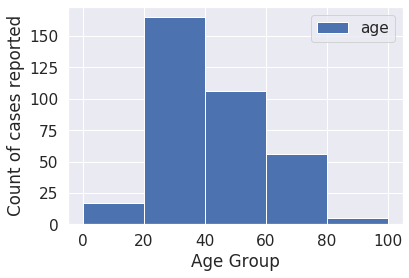

In [83]:
plt.figure(figsize=(20,15))
data[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=1.8)
plt.ylabel('Count of cases reported')
plt.xlabel('Age Group')
plt.show()

---
#### Analysis:
#### The most common affected people belongs to age group of 20-60.
---

> Graph between the count of affected people and Nationality.

In [84]:
data['nationality'].value_counts()

India             344
Unknown           276
Italy              18
Indonesia          14
United Kingdom      7
Phillipines         2
Thailand            2
Canada              1
Name: nationality, dtype: int64

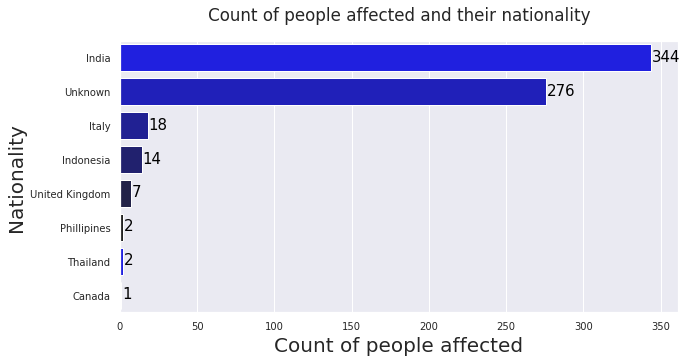

In [183]:
plt.figure(figsize=(10,5))
df=pd.DataFrame({'nationality':data['nationality'].value_counts().index,'Count':data['nationality'].value_counts().values})
ax=sns.barplot(x="Count",y="nationality",data=df, palette=sns.dark_palette("blue", reverse=True))
for i in ax.patches:
    ax.text(i.get_width()+0.50, i.get_y()+0.50, \
            str(int(i.get_width())), fontsize=15,color='black')
ax.set_title('Count of people affected and their nationality', pad=20)
plt.xlabel('Count of people affected', fontsize=20)
plt.ylabel('Nationality', fontsize=20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=8)
plt.show()

> Graph between gender and count of affected people.

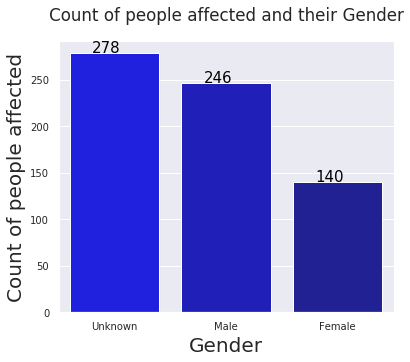

In [175]:
plt.figure(figsize=(6,5))
ax=sns.barplot(data['gender'].value_counts().index,data['gender'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.9, \
            str(int(i.get_height())), fontsize=15,
                color='black')
ax.set_title('Count of people affected and their Gender', pad=20)
plt.ylabel('Count of people affected', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=8)
plt.show()

> Graph between different states and number of detected cases.

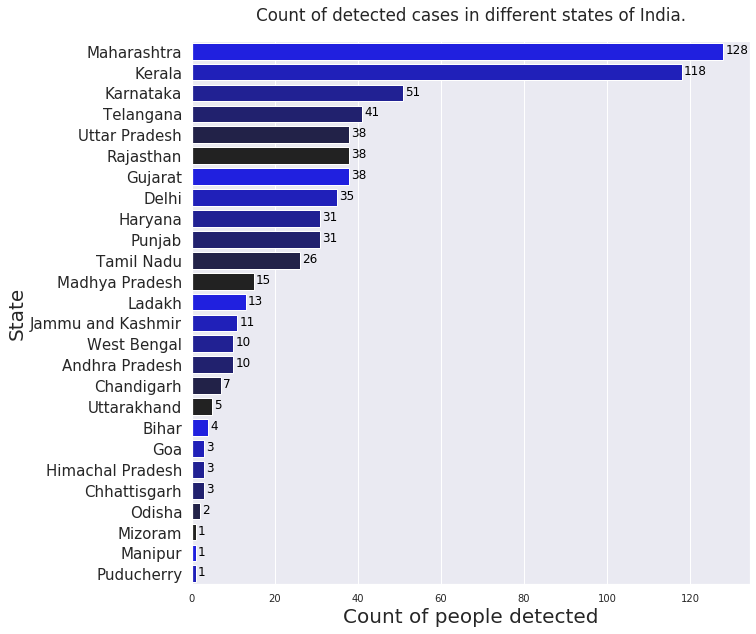

In [189]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data['detected_state'].value_counts().values,data['detected_state'].value_counts().index, palette=sns.dark_palette("blue", reverse=True))
for i in ax.patches:
    ax.text(i.get_width()+0.50, i.get_y()+0.50, \
            str(int(i.get_width())), fontsize=12,color='black')
ax.set_title('Count of detected cases in different states of India.', pad=20)
plt.xlabel('Count of people detected', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=15)
plt.show()

#### The graph clearly shows that Maharashtra is the most affected state followed by Kerala 

> Graph displaying status and count of affected people.

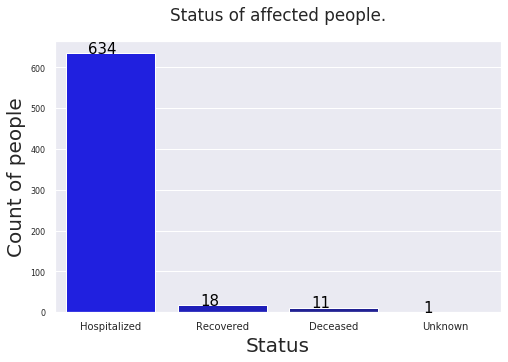

In [206]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data['current_status'].value_counts().index,data['current_status'].value_counts().values, palette=sns.dark_palette("blue", reverse=True))
for i in ax.patches:
    ax.text(i.get_x()+.20, i.get_height()+.10, \
            str(int(i.get_height())), fontsize=15,
                color='black')
ax.set_title('Status of affected people.', pad=20)
plt.ylabel('Count of people', fontsize=20)
plt.xlabel('Status', fontsize=20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=8)
plt.show()

> No. of people affected district wise

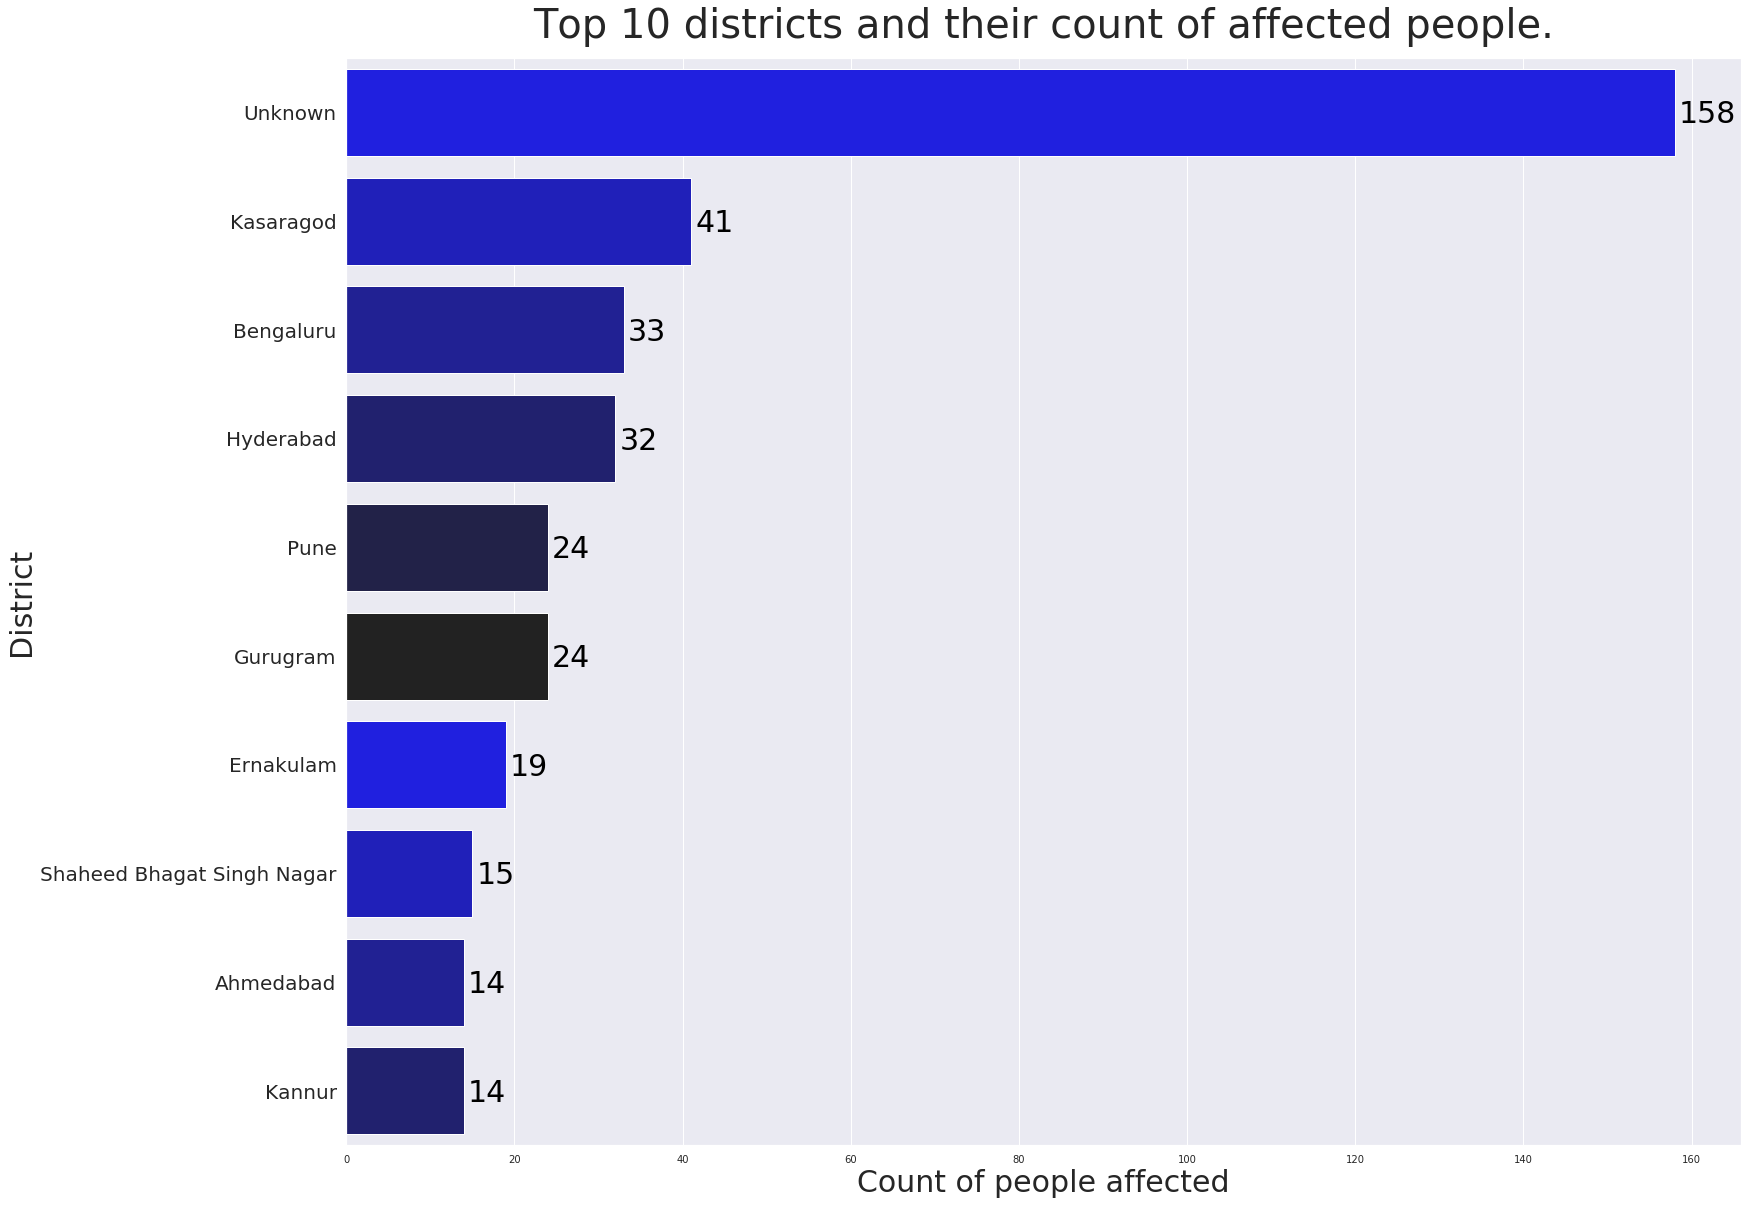

In [225]:
plt.figure(figsize=(25,20))
ax=sns.barplot(data['detected_district'].value_counts()[:10].values,data['detected_district'].value_counts()[:10].index, palette=sns.dark_palette("blue", reverse=True))
for i in ax.patches:
    ax.text(i.get_width()+0.50, i.get_y()+0.50, \
            str(int(i.get_width())), fontsize=30,color='black')
ax.set_title('Top 10 districts and their count of affected people.', pad=20,fontsize=40)
plt.xlabel('Count of people affected', fontsize=30)
plt.ylabel('District', fontsize=30)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.show()

> Graph showing relationship between current status and age of people

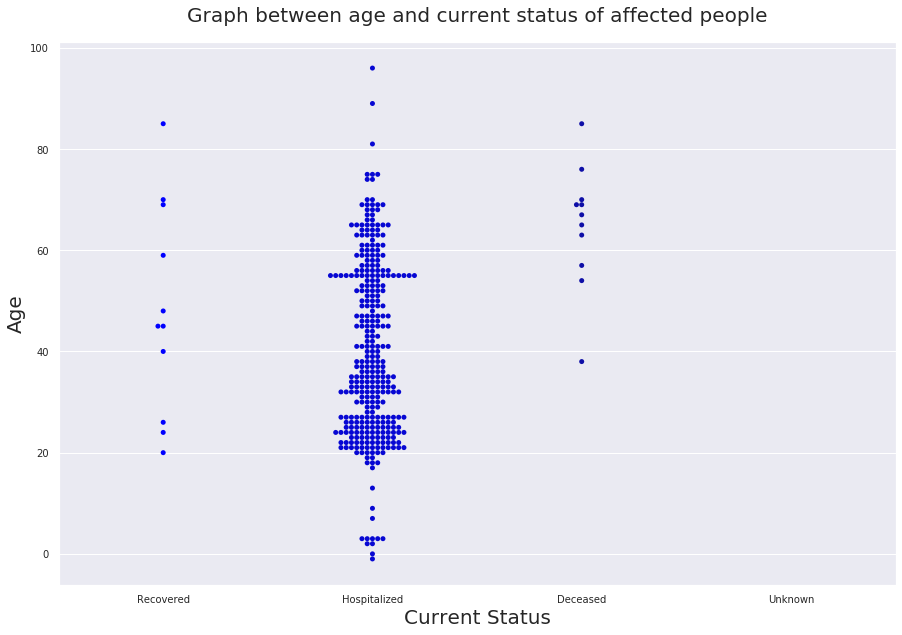

In [234]:
plt.figure(figsize=(15,10))
ax=sns.swarmplot(data['current_status'],data['age'],palette=sns.dark_palette("blue", reverse=True))
ax.set_title('Graph between age and current status of affected people', pad=20,fontsize=20)
plt.xlabel('Current Status', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

#### This swarmplot shows that majority of the people hospitalized are in the age group of ~18 to 88

#### No. of days between change in status

In [91]:
data.head()

,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,current_loc_latlong,current_lat,current_long
id,,,,,,,,,,,,,,,,,
1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (76.21325419999999 10.5256264),[],"[76.21325419999999, 10.5256264]",76.213254,10.525626
2,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (76.333482 9.498000100000001),[],"[76.333482, 9.498000100000001]",76.333482,9.498000
3,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (80 20),[],"[80, 20]",80.000000,20.000000
4,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",Unknown,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]","[80, 20]",80.000000,20.000000
5,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",Unknown,SRID=4326;POINT (78.4349398685041 17.4263524),[],"[78.4349398685041, 17.4263524]",78.434940,17.426352


#### Days taken to change status(Hospitalized/Death/Recover)

In [92]:
data['status change difference'] = pd.to_datetime(data['status_change_date'])-pd.to_datetime(data['diagnosed_date'])

In [93]:
data['status change difference'].value_counts()

0 days     633
1 days       4
2 days       3
-1 days      3
11 days      3
12 days      2
13 days      1
8 days       1
3 days       1
9 days       1
15 days      1
10 days      1
Name: status change difference, dtype: int64

### Graph to show relationship between status change

---

In [94]:
data.head()

,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts,current_loc_latlong,current_lat,current_long,status change difference
id,,,,,,,,,,,,,,,,,,
1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (76.21325419999999 10.5256264),[],"[76.21325419999999, 10.5256264]",76.213254,10.525626,15 days
2,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (76.333482 9.498000100000001),[],"[76.333482, 9.498000100000001]",76.333482,9.498000,12 days
3,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,Unknown,SRID=4326;POINT (80 20),[],"[80, 20]",80.000000,20.000000,11 days
4,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",Unknown,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]","[80, 20]",80.000000,20.000000,13 days
5,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",Unknown,SRID=4326;POINT (78.4349398685041 17.4263524),[],"[78.4349398685041, 17.4263524]",78.434940,17.426352,0 days


In [95]:
diagnose_data=pd.DataFrame({'Dates':pd.to_datetime(data['diagnosed_date']).value_counts().index,
                           'Count':pd.to_datetime(data['diagnosed_date']).value_counts().values})
diagnose_data=diagnose_data.sort_values('Dates')
diagnose_data=diagnose_data.reset_index(drop=True)
diagnose_data=diagnose_data.set_index('Dates')

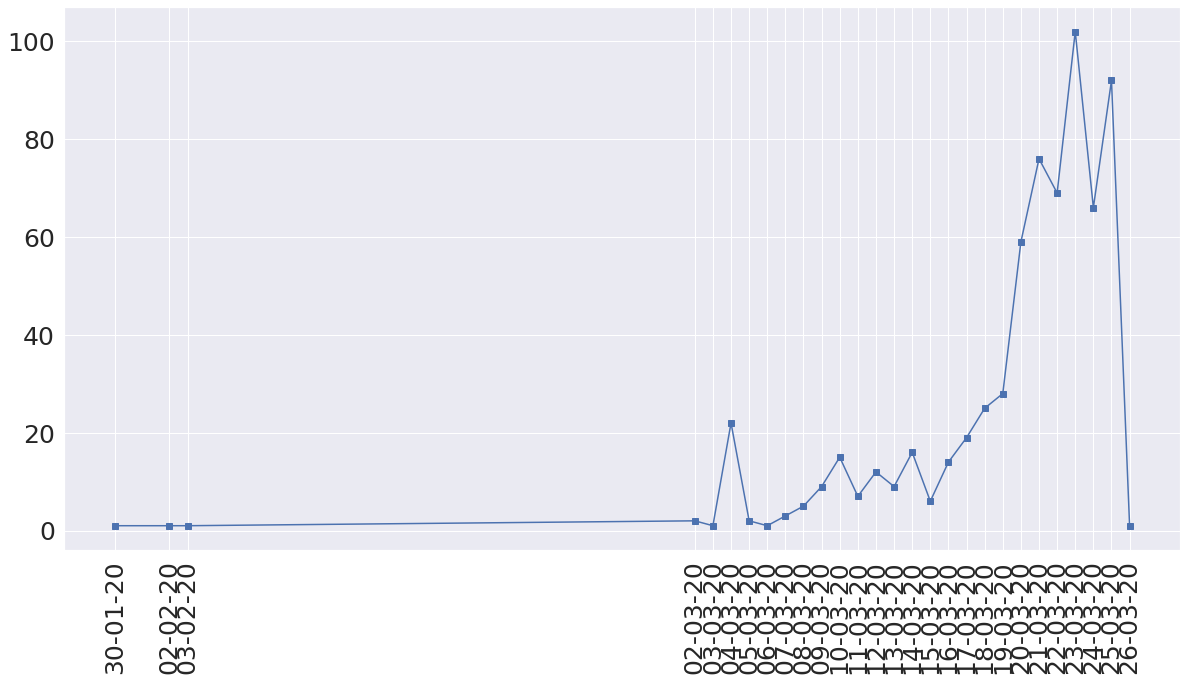

In [96]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,10))
graph=ax.plot(diagnose_data.Count,marker='s')
myFmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(myFmt)
plt.rc('xtick',labelsize=8)
plt.xticks(diagnose_data.index.values,rotation=90)
plt.show()

In [97]:
diagnose_data['cumsum']=diagnose_data['Count'].cumsum()

In [98]:
diagnose_data['cumsum']

Dates
2020-01-30      1
2020-02-02      2
2020-02-03      3
2020-03-02      5
2020-03-03      6
2020-03-04     28
2020-03-05     30
2020-03-06     31
2020-03-07     34
2020-03-08     39
2020-03-09     48
2020-03-10     63
2020-03-11     70
2020-03-12     82
2020-03-13     91
2020-03-14    107
2020-03-15    113
2020-03-16    127
2020-03-17    146
2020-03-18    171
2020-03-19    199
2020-03-20    258
2020-03-21    334
2020-03-22    403
2020-03-23    505
2020-03-24    571
2020-03-25    663
2020-03-26    664
Name: cumsum, dtype: int64

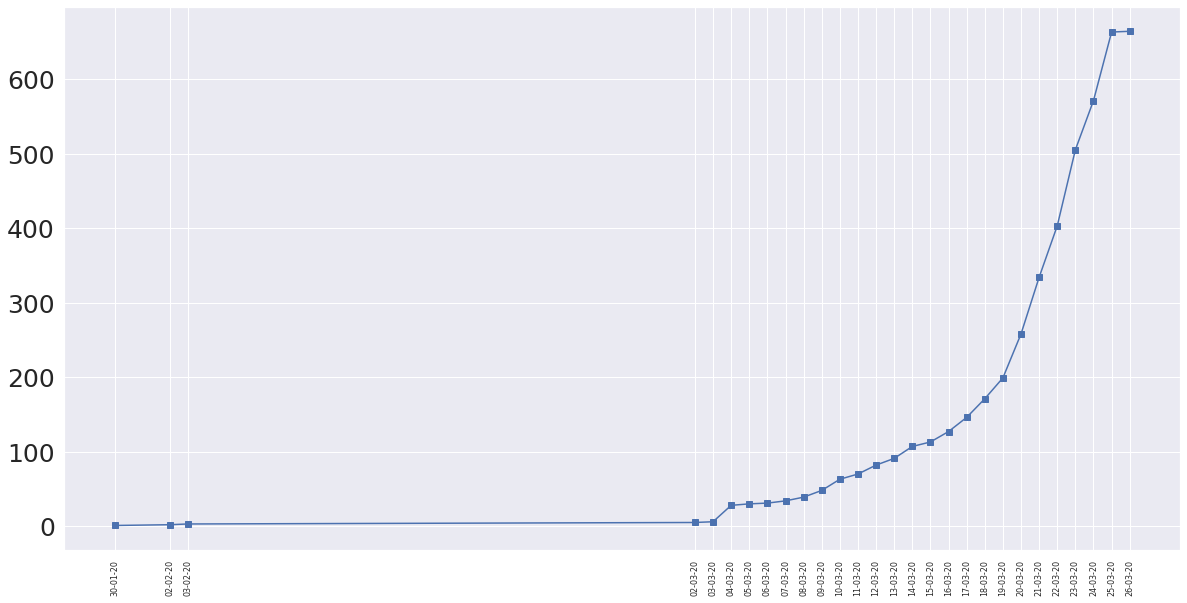

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
graph=ax.plot(diagnose_data['cumsum'],marker='s')
myFmt = mdates.DateFormatter('%d-%m-%y')
ax.xaxis.set_major_formatter(myFmt)
plt.rc('xtick',labelsize=8)
plt.xticks(diagnose_data.index.values,rotation=90)
plt.show()

Data fetched from local news about the shutdown process in India.

In [100]:
entities = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

Using  boolean mask to fetch case counts within dates

In [101]:
# Now getting the cases count before each entity shutdown.
data = data.sort_values(by="diagnosed_date")

In [105]:
mask1 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') # before school lockdown
mask1 = len(data.loc[mask1])
mask2 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
mask2 = len(data.loc[mask2])
mask3 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') # beforw wfh
mask3 = len(data.loc[mask3])
mask4 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') # beforw lookdown
mask4 = len(data.loc[mask4])
mask5 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') # beforw lookdown
mask5 = len(data.loc[mask5])

In [106]:
case_counts = [mask1, mask2,mask3,mask4,mask5]

In [107]:
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'entities': entities})

In [108]:
plot_data

,dates,counts,entities
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,663,current situation


In [115]:
plot_data['dates'] = pd.to_datetime(plot_data['dates'])